# Denoising

![](https://images.unsplash.com/photo-1548069124-75c4a08968cc?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Picture by [Anton Scherbakov](https://unsplash.com/photos/ZLBUaIsaY6k)

We will here use AutoEncoders for denoising images.

The idea is simple: train an autoencoder on noiseless images. Once the autoencoder is trained, input a noisy image, it should output the denoised image.

Let's work again with the MNIST fashion dataset. Load it.

First download the dataset. As a reminder, the labels are the following:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

In [13]:
labels_map = { 0: 'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot'
             }

In [14]:
### TODO: Import the dataset and display an image
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random

In [7]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

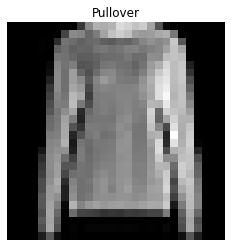

In [26]:
img = random.randint(0, X_train.shape[0])
plt.imshow(X_train[img], cmap='gray')
plt.axis('off')
plt.title(labels_map[y_train[img]])
plt.show()

Build an autoencoder for those images. You can reuse the architecture of the lectures.

> Since this is for denoising (not any generation), a regular autoencoder is good enough!

In [36]:
X_train_rs = X_train.reshape(len(X_train), -1) / 255
X_test_rs = X_test.reshape(len(X_test), -1) / 255

In [76]:
### TODO: Build an autoencoder
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_dim = 28*28
latent_dim = 128

# define the input layer: the pixel values
input_img = Input(shape=(input_dim,))

# encode
encoded = Dense(latent_dim, activation='relu')(input_img)

# decode
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

Now compile and train your AutoEncoder using the fashion data.

In [77]:
### TODO: Train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [78]:
autoencoder.fit(X_train_rs, X_train_rs, validation_data=(X_test_rs, X_test_rs), epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0334 - val_loss: 0.0173
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0138 - val_loss: 0.0117
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0097
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0091 - val_loss: 0.0088
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0063 - val_loss: 0.0062

Check out how your model worked: display some pairs of input and output images.

In [79]:
### TODO: Display some reconstructed images
reconstructed_imgs = autoencoder.predict(X_test_rs)

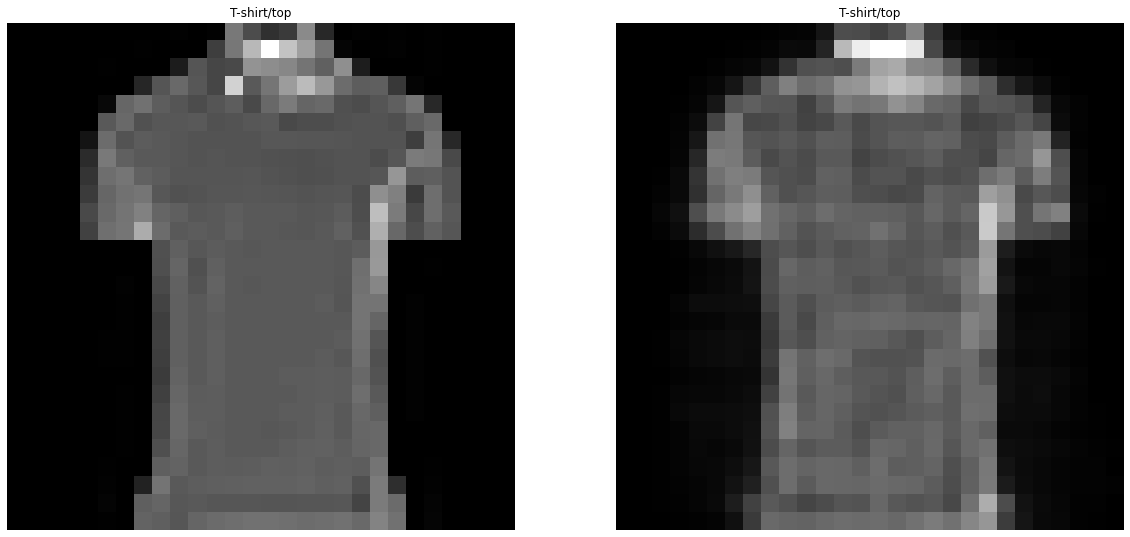

In [84]:
img = random.randint(0, X_test.shape[0])
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(X_test[img], cmap='gray')
plt.axis('off')
plt.title(labels_map[y_test[img]])
plt.subplot(122)
plt.imshow(reconstructed_imgs[img].reshape(28,28), cmap='gray')
plt.axis('off')
plt.title(labels_map[y_test[img]])
plt.show()

We have defined below a function to add noise.

In [85]:
import numpy as np
def add_noise(X_train, noise_factor=0.35):

    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0*X_train.max(), size=X_train.shape) 
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)

    return X_train_noisy

Use this function to create a noisy dataset of the test images. Display some noisy images.

In [86]:
### TODO: Create a noisy dataset
X_train_noisy = add_noise(X_train_rs)
X_test_noisy = add_noise(X_test_rs)

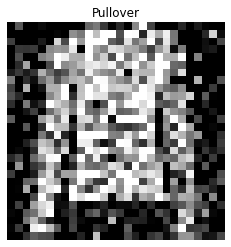

In [87]:
img = random.randint(0, X_train_noisy.shape[0])
plt.imshow(X_train_noisy[img].reshape(28,28), cmap='gray')
plt.axis('off')
plt.title(labels_map[y_train[img]])
plt.show()

If you used the default `noise_factor` parameter, you should barely distinguish some images by eye, but you can tune it differently if you wish to.

Now try using your trained autoencoder: use the autoencoder with the noisy images as input, and try to predict the denoised images.

In [88]:
### TODO: Use the autoencoder to denoise images
X_test_denoised = autoencoder.predict(X_test_noisy)

Now display side by side a noisy image and the denoised image.

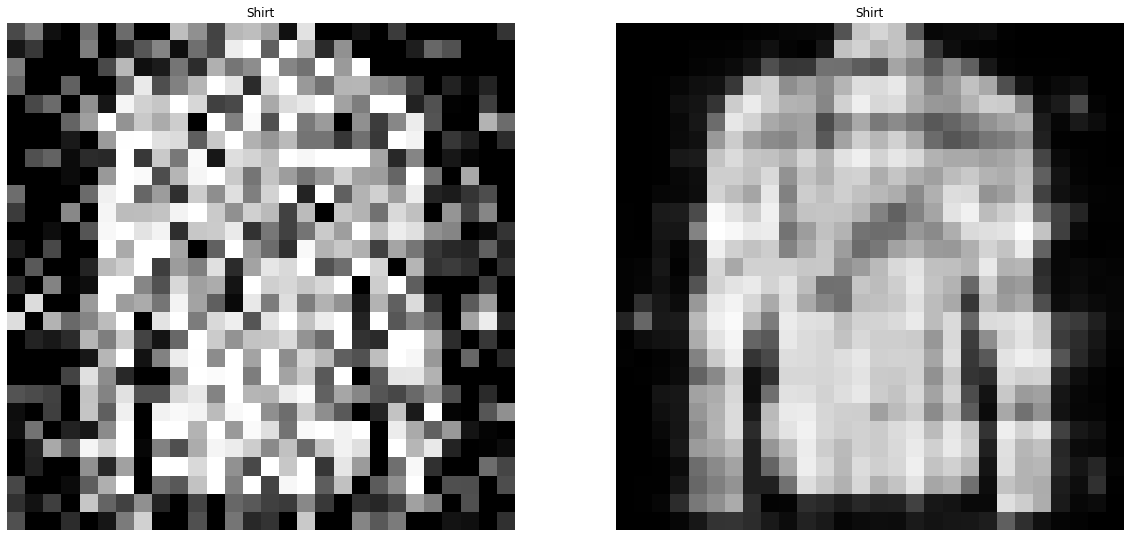

In [99]:
### TODO: Display side by side the noisy and denoised images
img = random.randint(0, X_test.shape[0])
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(X_test_noisy[img].reshape(28,28), cmap='gray')
plt.axis('off')
plt.title(labels_map[y_test[img]])
plt.subplot(122)
plt.imshow(X_test_denoised[img].reshape(28,28), cmap='gray')
plt.axis('off')
plt.title(labels_map[y_test[img]])
plt.show()

How did that work?

## Optional

You can get better results using CNN autoencoder instead of regular autoencoder.

If you have time, you can have a try. You might need to use the `UpSampling2D` layer, which is the opposite of the `MaxPooling2D` layer.

In [112]:
### TODO: Redo the exercise with a CNN autoencoder
from tensorflow.keras.layers import Conv2D, UpSampling2D, MaxPooling2D, Flatten, Dense


# encode
cnn_input = Input(shape=(28,28,1))
cnn_encoded_input = Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu')(cnn_input)
cnn_encoded = MaxPooling2D(pool_size=(2,2))(cnn_encoded_input)

# decode
cnn_resizing = UpSampling2D(size=(2,2), interpolation='nearest')(cnn_encoded)
cnn_flattening = Flatten()(cnn_resizing)
cnn_decoded = Dense(784, activation='sigmoid')(cnn_flattening)

# Define the autoencoder model
cnn_autoencoder = Model(cnn_input, cnn_decoded)

In [113]:
cnn_autoencoder.compile(optimizer='adam', loss='mse')

In [119]:
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1) / 255
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255

In [122]:
cnn_autoencoder.fit(X_train_cnn, X_train_cnn.reshape(X_train_cnn.shape[0], -1), validation_data=(X_test_cnn, X_test_cnn.reshape(X_test_cnn.shape[0], -1)), epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 21s 44ms/step - loss: 0.0187 - val_loss: 0.0098
Epoch 2/20
469/469 [==============================] - 21s 44ms/step - loss: 0.0082 - val_loss: 0.0072
Epoch 3/20
469/469 [==============================] - 21s 44ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 4/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 5/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 6/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 7/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 8/20
469/469 [==============================] - 21s 46ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 9/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 10/20
469/469 [==============================] - 21s 45ms/step - loss: 0.004

In [123]:
X_train_cnn_noisy = add_noise(X_train_cnn)
X_test_cnn_noisy = add_noise(X_test_cnn)

In [124]:
X_test_cnn_denoised = cnn_autoencoder.predict(X_test_cnn_noisy)

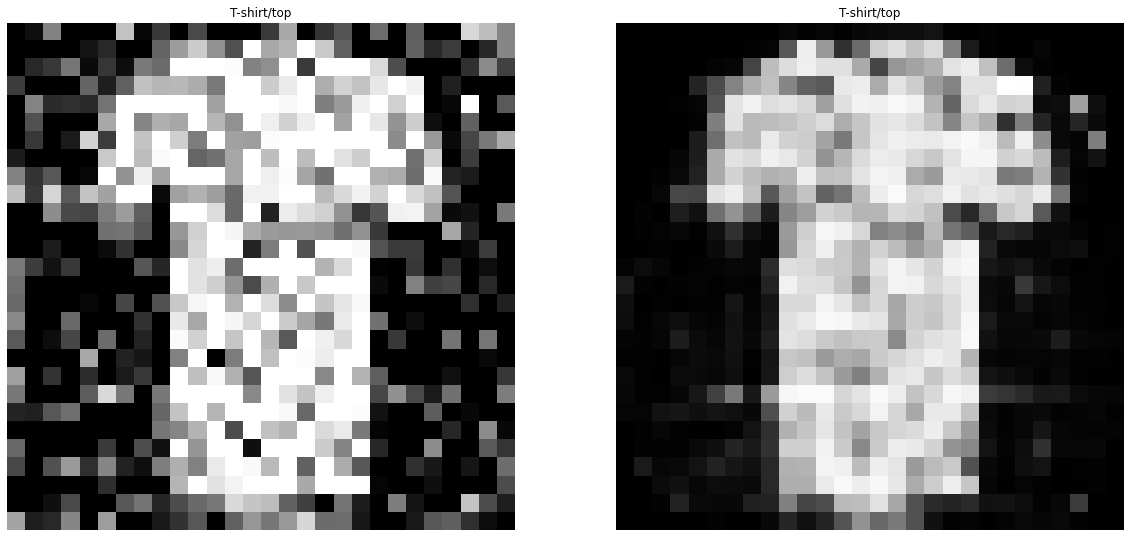

In [134]:
### TODO: Display side by side the noisy and denoised images
img = random.randint(0, X_test_cnn.shape[0])
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(X_test_cnn_noisy[img].reshape(28,28), cmap='gray')
plt.axis('off')
plt.title(labels_map[y_test[img]])
plt.subplot(122)
plt.imshow(X_test_cnn_denoised[img].reshape(28,28), cmap='gray')
plt.axis('off')
plt.title(labels_map[y_test[img]])
plt.show()